In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/ashutoshanand/Downloads/Price_dataset.csv', index_col='Date', parse_dates=True)

df.index.freq= 'MS'

In [3]:
df.head()

,Gram,Moong,Arhar
Date,,,
2014-01-01,101.8,113.6,106.7
2014-02-01,101.1,116.9,106.5
2014-03-01,100.5,120.0,106.0
2014-04-01,100.6,124.1,106.6
2014-05-01,100.4,126.6,106.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129 entries, 2014-01-01 to 2024-09-01
Freq: MS
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gram    129 non-null    float64
 1   Moong   129 non-null    float64
 2   Arhar   129 non-null    float64
dtypes: float64(3)
memory usage: 4.0 KB


# Descriptive statistics

<Axes: xlabel='Date'>

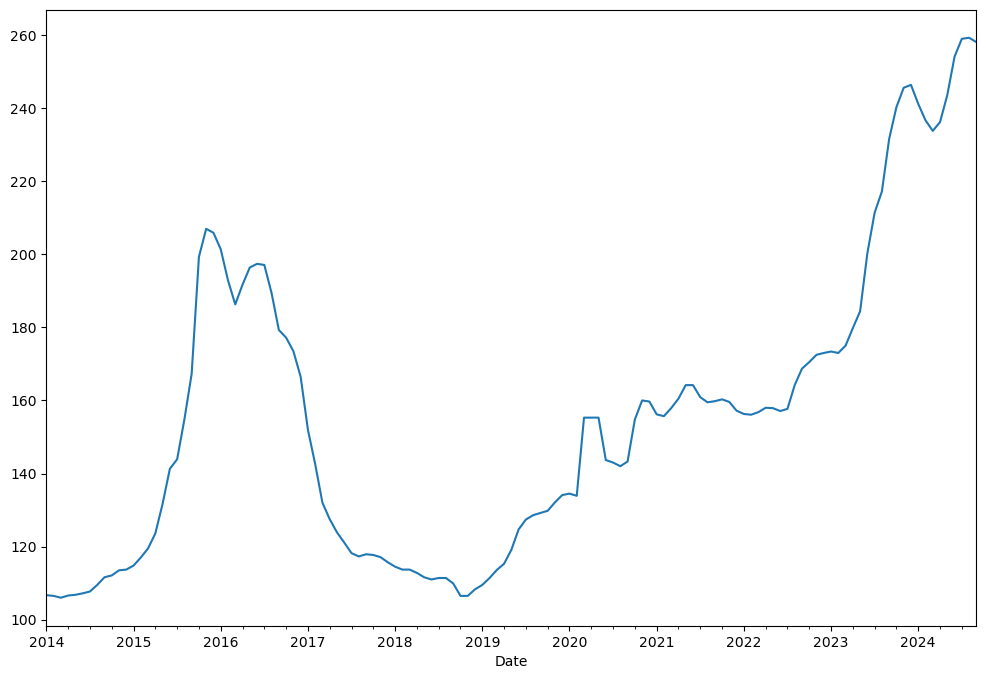

In [5]:
df['Arhar'].plot(figsize=(12,8))

In [6]:
df['Moong'].describe()

count    129.000000
mean     145.713178
std       21.457128
min      113.600000
25%      125.800000
50%      145.700000
75%      160.300000
max      186.300000
Name: Moong, dtype: float64

In [7]:
df['Gram'].skew()

0.05662678183949648

In [8]:
df['Moong'].kurtosis()

-1.1231018154212025

## Decompose the series

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [10]:
decompose = seasonal_decompose(df['Arhar'], model='add')

In [11]:
decompose.seasonal

Date
2014-01-01   -0.327917
2014-02-01   -3.662500
2014-03-01   -3.807083
2014-04-01   -2.536759
2014-05-01   -1.519630
                ...   
2024-05-01   -1.519630
2024-06-01   -0.934444
2024-07-01   -1.052917
2024-08-01   -0.635833
2024-09-01    0.759167
Freq: MS, Name: seasonal, Length: 129, dtype: float64

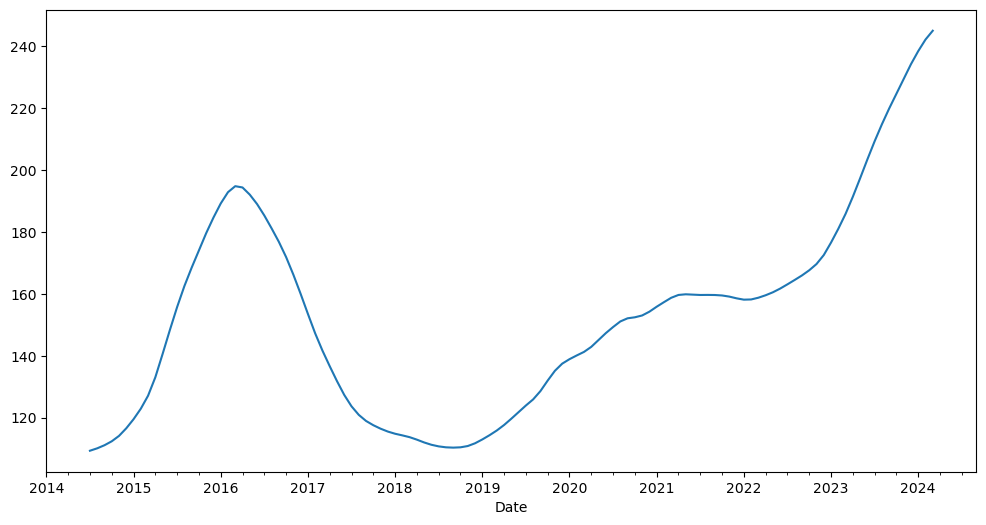

In [12]:
decompose.trend.plot(figsize=(12,6));

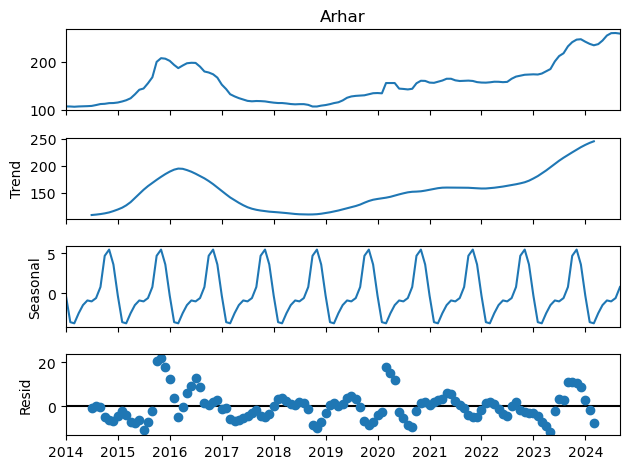

In [13]:
# Plot the decomposition
decompose.plot()
plt.show()

<Axes: >

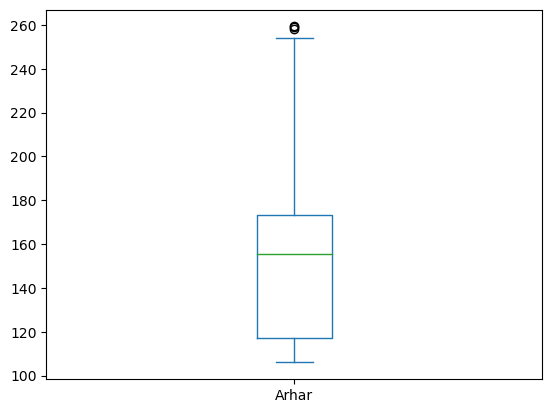

In [17]:
df['Arhar'].plot.box()

# Time series modeling

# Stationarity test

A stationary process has the property that the mean, variance and autocorrelation structure do not change over time.

> $H_0$ : Series is unitroot or non stationary,
>> $H_1$ : Series is stationary

<Axes: xlabel='Date'>

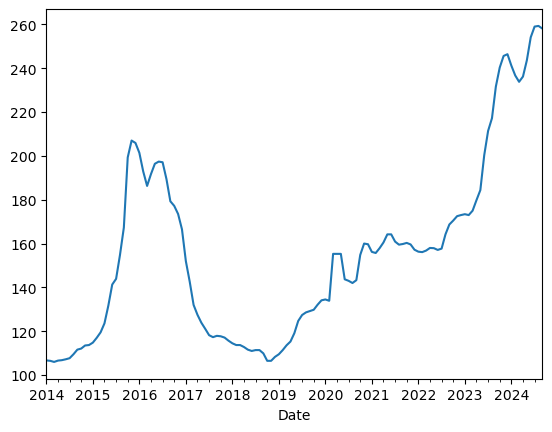

In [16]:
df['Arhar'].plot()

In [19]:
from arch.unitroot import ADF, KPSS, PhillipsPerron

In [20]:
PhillipsPerron(df['Arhar'])

Test Statistic,-0.625
P-value,0.865
Lags,13


In [21]:
ADF(df['Arhar'])

Test Statistic,-0.823
P-value,0.812
Lags,1


#### 1st diff

In [22]:
df_diff = df['Arhar'].diff(periods=1).iloc[1:]

In [23]:
df_diff.head()

Date
2014-02-01   -0.2
2014-03-01   -0.5
2014-04-01    0.6
2014-05-01    0.2
2014-06-01    0.4
Freq: MS, Name: Arhar, dtype: float64

In [24]:
PhillipsPerron(df_diff)

Test Statistic,-6.011
P-value,0.000
Lags,13


In [25]:
df_diff.head()

Date
2014-02-01   -0.2
2014-03-01   -0.5
2014-04-01    0.6
2014-05-01    0.2
2014-06-01    0.4
Freq: MS, Name: Arhar, dtype: float64

In [26]:
ADF(df_diff)

Test Statistic,-5.865
P-value,0.000
Lags,0


##### In diff. 1, the data series are in stationary.

<Axes: xlabel='Date'>

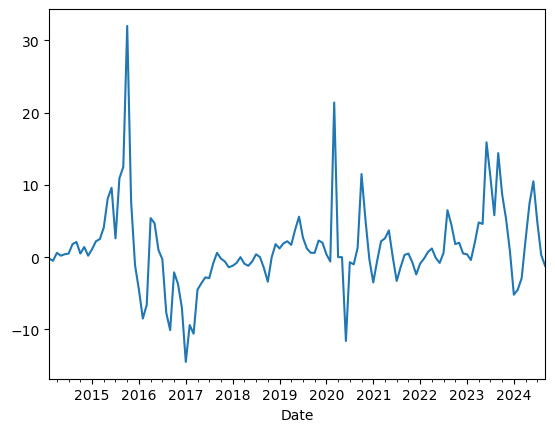

In [27]:
df_diff.plot()

## ACF and PACF plot

>**Autocorrelation** represents the degree of similarity between a given time series and a lagged version of itself over successive time intervals.

> **Partial Autocorrelation** is a conditional correlation.

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

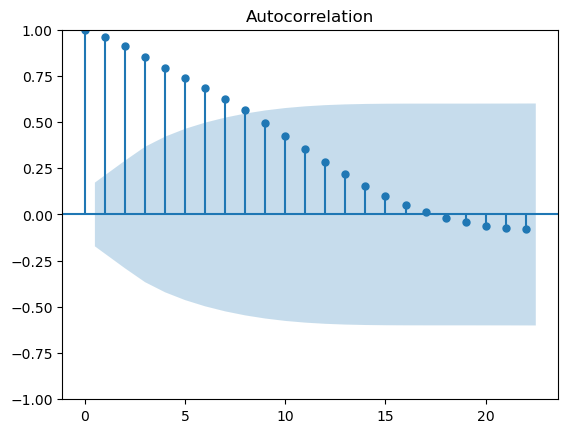

In [29]:
plot_acf(df['Arhar']); # q order

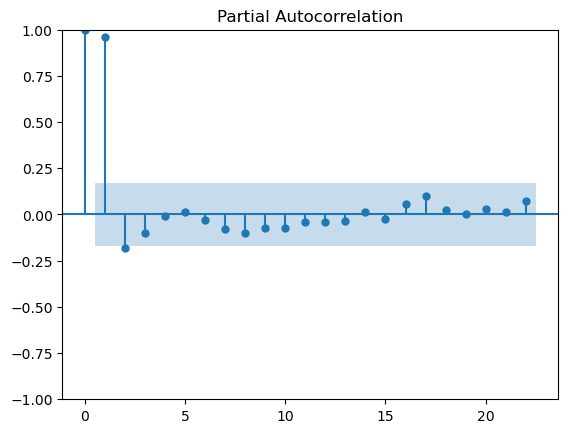

In [30]:
plot_pacf(df['Arhar']); # p order

# AUTO ARIMA

In [31]:
from pmdarima import auto_arima

In [32]:
stepwise_fit = auto_arima(df['Arhar'], start_p=0,start_q=0, max_p=6,max_q=3, m=12, seasonal=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=819.538, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=816.298, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=770.260, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=785.451, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=819.552, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=768.876, Time=0.02 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=770.230, Time=0.11 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=772.222, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=770.860, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=770.865, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=783.943, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=771.634, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[12]             : AIC=768.251, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12]             : AIC=769.447, Time=0.03 sec
 ARIMA(1,1,0)(0,0,1)[12]         

In [33]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  129
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -382.125
Date:                Mon, 11 Nov 2024   AIC                            768.251
Time:                        01:42:47   BIC                            773.955
Sample:                    01-01-2014   HQIC                           770.568
                         - 09-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5810      0.041     14.108      0.000       0.500       0.662
sigma2        22.8647      1.307     17.500      0.000      20.304      25.426
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               383.92
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.39   Skew:                             1.59
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults

In [35]:
from statsmodels.tsa.arima.model import ARIMA

In [36]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129 entries, 2014-01-01 to 2024-09-01
Freq: MS
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gram    129 non-null    float64
 1   Moong   129 non-null    float64
 2   Arhar   129 non-null    float64
dtypes: float64(3)
memory usage: 4.0 KB


In [38]:
train = df.iloc[:115]
test = df.iloc[115:]

In [39]:
len(test)

14

In [40]:
train.tail()

,Gram,Moong,Arhar
Date,,,
2023-03-01,153.7,164.0,175.0
2023-04-01,154.4,167.5,179.8
2023-05-01,155.1,169.5,184.4
2023-06-01,156.1,171.7,200.3
2023-07-01,157.1,173.2,211.4


In [41]:
test.head()

,Gram,Moong,Arhar
Date,,,
2023-08-01,159.9,174.2,217.2
2023-09-01,168.0,177.7,231.6
2023-10-01,173.3,180.4,240.3
2023-11-01,176.1,182.0,245.6
2023-12-01,177.6,182.4,246.4


## ARIMA Model for Gram


ARIMA(p,d,q)

In [53]:
model_gram = ARIMA(train['Arhar'], order=(1,1,0))

result_gram = model_gram.fit()
result_gram.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Arhar   No. Observations:                  115
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -341.556
Date:                Mon, 11 Nov 2024   AIC                            687.113
Time:                        01:45:04   BIC                            692.585
Sample:                    01-01-2014   HQIC                           689.334
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5601      0.044     12.685      0.000       0.474       0.647
sigma2        23.3602      1.382     16.908      0.000      20.652      26.068
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               406.02
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                             1.71
Prob(H) (two-sided):                  0.01   Kurtosis:                        11.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [54]:
prediction_gram = result_gram.predict(start=len(train),end=len(train)+len(test)-1, typ='levels').rename('ARIMA(1,1,0)-predictions')

In [55]:
prediction_gram

2023-08-01    217.617381
2023-09-01    221.099888
2023-10-01    223.050525
2023-11-01    224.143124
2023-12-01    224.755116
2024-01-01    225.097907
2024-02-01    225.289913
2024-03-01    225.397460
2024-04-01    225.457700
2024-05-01    225.491441
2024-06-01    225.510341
2024-07-01    225.520927
2024-08-01    225.526857
2024-09-01    225.530178
Freq: MS, Name: ARIMA(1,1,0)-predictions, dtype: float64

In [56]:
test['ARIMA_prediction']= prediction_gram

<Axes: title={'center': 'True prediction_ARIMA'}, xlabel='Date'>

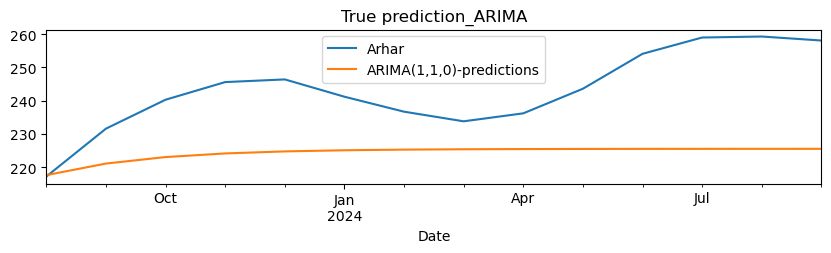

In [57]:
test['Arhar'].plot(figsize=(10,2), legend=True, title='True prediction_ARIMA')
prediction_gram.plot(legend=True)

## Error estimation

In [58]:
from statsmodels.tools.eval_measures import rmse, mse

In [59]:
rmse(test['Arhar'],prediction_gram)

21.347284931410776

In [60]:
mse(test['Arhar'],prediction_gram)

455.70657394283757

In [61]:
test['Arhar'].mean()

243.07857142857142

In [62]:
prediction_gram.mean()

224.24919686341067

# Final Model Forecasting

In [63]:
FinalModel_gram = ARIMA(df['Arhar'], order=(1,1,0))

FinalResult_gram = FinalModel_gram.fit()

In [64]:
FinalResult_gram.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Arhar   No. Observations:                  129
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -382.125
Date:                Mon, 11 Nov 2024   AIC                            768.251
Time:                        01:45:57   BIC                            773.955
Sample:                    01-01-2014   HQIC                           770.568
                         - 09-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5810      0.041     14.108      0.000       0.500       0.662
sigma2        22.8647      1.307     17.500      0.000      20.304      25.426
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               383.92
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.39   Skew:                             1.59
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [65]:
forecast_gram = FinalResult_gram.predict(start=len(df),end=len(df)+12 , typ='levels').rename('ARIMA(1,1,0)-forecast')

<Axes: xlabel='Date'>

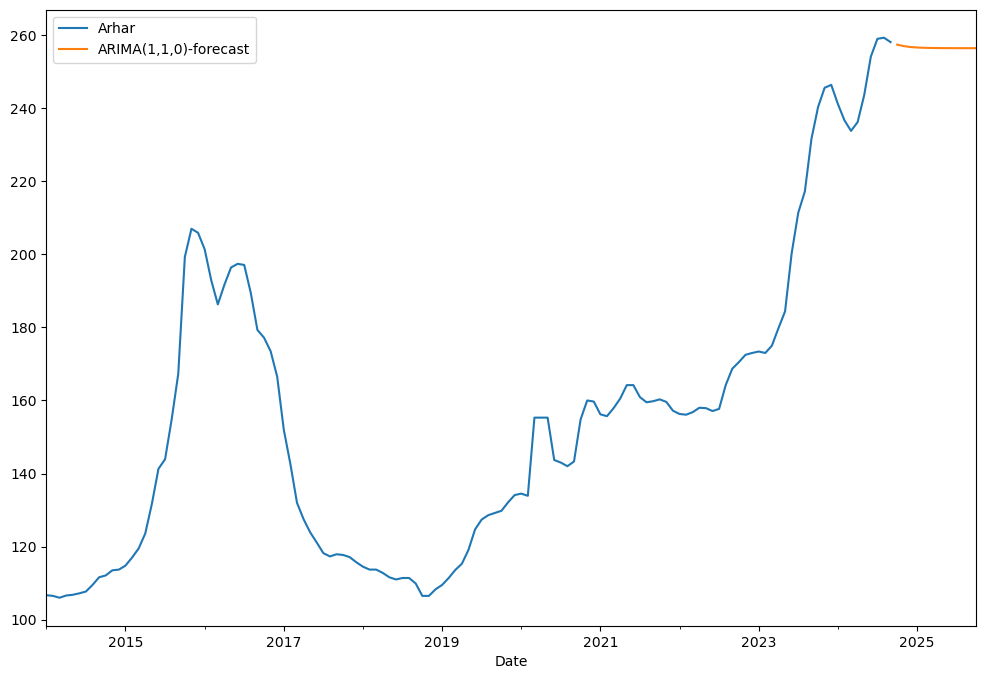

In [66]:
df['Arhar'].plot(figsize=(12,8),legend=True)
forecast_gram.plot(legend=True)

In [67]:
print(forecast_gram)

2024-10-01    257.402765
2024-11-01    256.997651
2024-12-01    256.762268
2025-01-01    256.625504
2025-02-01    256.546040
2025-03-01    256.499869
2025-04-01    256.473042
2025-05-01    256.457455
2025-06-01    256.448398
2025-07-01    256.443136
2025-08-01    256.440079
2025-09-01    256.438302
2025-10-01    256.437270
Freq: MS, Name: ARIMA(1,1,0)-forecast, dtype: float64


# Kolmogorov-Smirnov test for goodness of fit. Normality of residuals

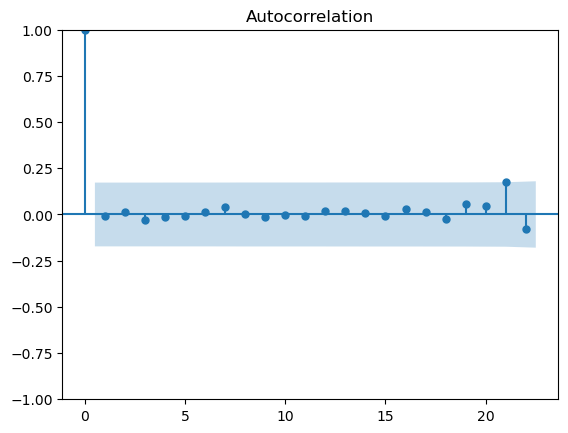

In [68]:
plot_acf(FinalResult_gram.resid);

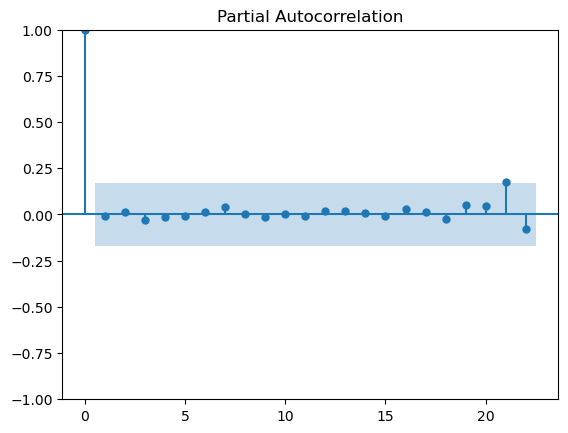

In [69]:
plot_pacf(FinalResult_gram.resid);

<Axes: xlabel='Date'>

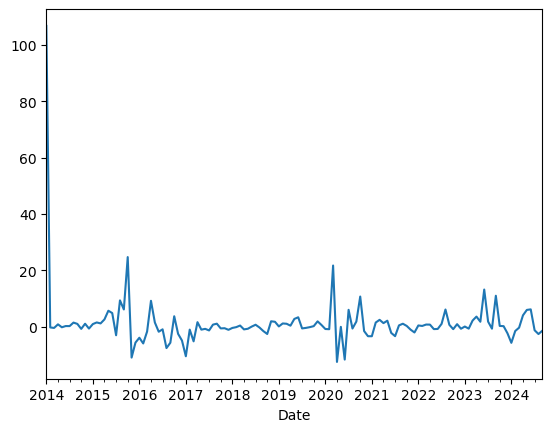

In [70]:
FinalResult_gram.resid.plot()

<Axes: ylabel='Frequency'>

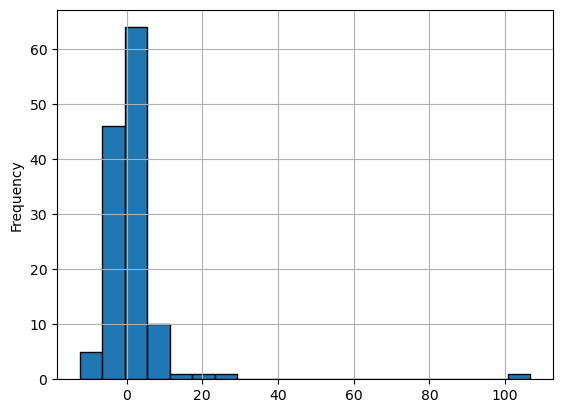

In [71]:
FinalResult_gram.resid.plot.hist(bins=20,grid=True,edgecolor='k')

##### Normality test

In [72]:
stats.kstest(FinalResult_gram.resid.values, 'norm') # Kolmogorov-Smirnov test

KstestResult(statistic=0.20573043864379736, pvalue=2.890810650030005e-05, statistic_location=1.5094854076250641, statistic_sign=-1)

In [58]:
stats.shapiro(FinalResult_gram.resid)      # Shapiro wilk test

ShapiroResult(statistic=0.17597466707229614, pvalue=9.964264599193076e-24)

In [74]:
from statsmodels.graphics.tsaplots import quarter_plot, month_plot

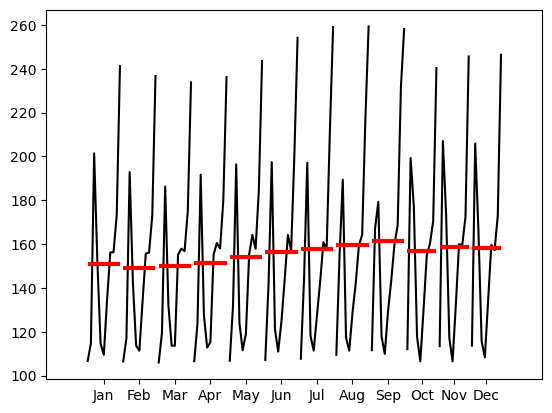

In [75]:
month_plot(df['Arhar']);

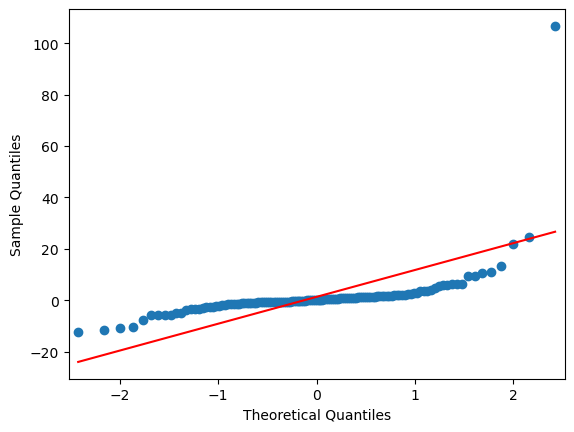

In [76]:
import numpy as np
import statsmodels.api as sm
import pylab


sm.qqplot(FinalResult_gram.resid, line='s');

In [77]:
sm.stats.diagnostic.acorr_ljungbox(FinalResult_gram.resid, lags=[30],return_df=True)

,lb_stat,lb_pvalue
30,9.156845,0.999911


# ARIMA-GARCH

In [79]:
sm.stats.diagnostic.het_arch(FinalResult_gram.resid, nlags=10)

(5.6885283578952315,
 0.8407177674537583,
 0.5421878771402334,
 0.8566287542942457)

In [80]:
resid= FinalResult_gram.resid

In [81]:
resid

Date
2014-01-01    106.700000
2014-02-01     -0.202140
2014-03-01     -0.383794
2014-04-01      0.890515
2014-05-01     -0.148618
                 ...    
2024-05-01      6.005530
2024-06-01      6.200384
2024-07-01     -1.200806
2024-08-01     -2.547043
2024-09-01     -1.374309
Freq: MS, Length: 129, dtype: float64

In [82]:
resid_train = resid.iloc[:115]
resid_test = resid.iloc[115:]

In [83]:
from arch import arch_model

In [84]:
model_garch = arch_model(resid_train , mean='constant', vol='GARCH', p=1, q=1)
results_garch = model_garch.fit(update_freq = 5)
results_garch.summary()

Iteration:      5,   Func. Count:     30,   Neg. LLF: 352.0066177393909
Iteration:     10,   Func. Count:     55,   Neg. LLF: 349.3440598831649
Iteration:     15,   Func. Count:     80,   Neg. LLF: 348.7534387570406
Optimization terminated successfully    (Exit mode 0)
            Current function value: 348.7530020813339
            Iterations: 20
            Function evaluations: 99
            Gradient evaluations: 19


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -348.753
Distribution:                  Normal   AIC:                           705.506
Method:            Maximum Likelihood   BIC:                           716.486
                                        No. Observations:                  115
Date:                Mon, Nov 11 2024   Df Residuals:                      114
Time:                        01:47:18   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.6987      0.540      1.295      0.195 [ -0.359,  1.756]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega         12.5839      5.936      2.120  3.402e-02      [  0.949, 24.219]
alpha[1]       1.0000      0.500      1.999  4.563e-02    [1.942e-02,  1.981]
beta[1]        0.0000  1.528e-03      0.000      1.000 [-2.995e-03,2.995e-03]
=============================================================================

Covariance estimator: robust
"""

In [85]:
resid_test

Date
2023-08-01    -0.649424
2023-09-01    11.030031
2023-10-01     0.333180
2023-11-01     0.245046
2023-12-01    -2.279455
2024-01-01    -5.664823
2024-02-01    -1.478648
2024-03-01    -0.285369
2024-04-01     4.084985
2024-05-01     6.005530
2024-06-01     6.200384
2024-07-01    -1.200806
2024-08-01    -2.547043
2024-09-01    -1.374309
Freq: MS, dtype: float64

In [86]:
rolling_predictions = []
test_size = 14

for i in range(test_size):
    train = resid[:-(test_size-i)]
    model = arch_model(train, mean='constant', vol='GARCH', p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [87]:
rolling_predictions = pd.Series(rolling_predictions, index=resid.index[-14:])

In [88]:
rolling_predictions

Date
2023-08-01     3.733137
2023-09-01     3.775652
2023-10-01    10.825312
2023-11-01     3.674067
2023-12-01     3.661518
2024-01-01     4.755154
2024-02-01     7.403158
2024-03-01     4.267536
2024-04-01     3.759437
2024-05-01     4.888377
2024-06-01     6.322796
2024-07-01     6.460867
2024-08-01     4.123404
2024-09-01     4.910279
Freq: MS, dtype: float64

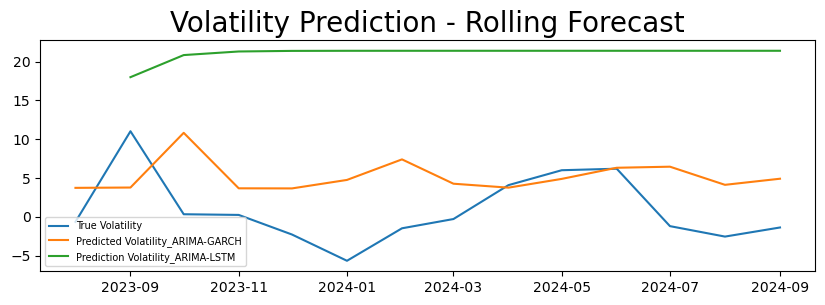

In [177]:
plt.figure(figsize=(10,3))
true, = plt.plot(resid_test)
preds, = plt.plot(rolling_predictions)
pred, = plt.plot(test_resid['prediction Volatility ARIMA-LSTM(Random_Forest)'])
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility_ARIMA-GARCH','Prediction Volatility_ARIMA-LSTM'], fontsize=7)

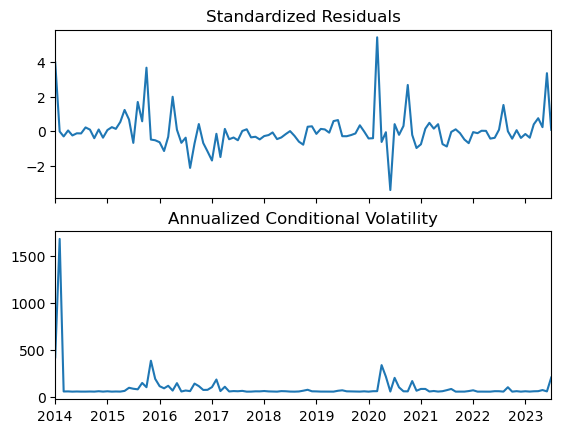

In [90]:
results_garch.plot(annualize='D');

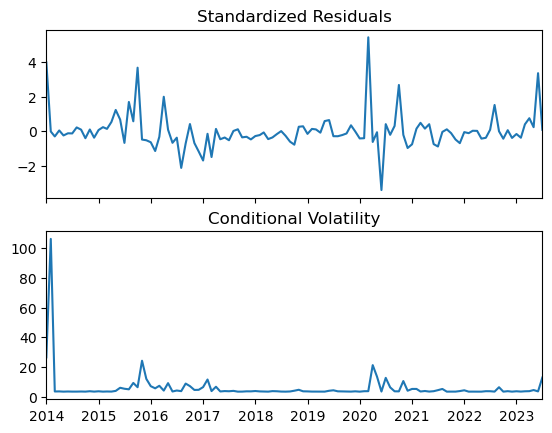

In [91]:
results_garch.plot();

## Normality Check

<Axes: ylabel='Frequency'>

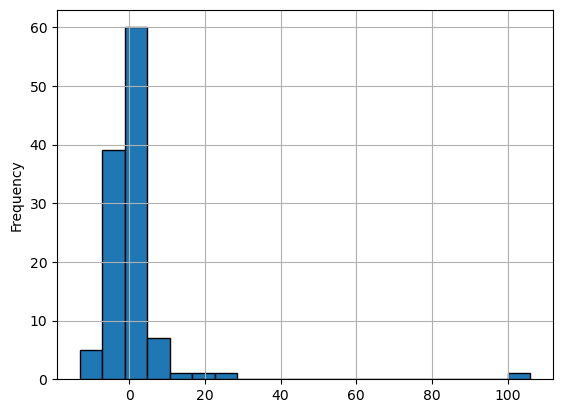

In [92]:
results_garch.resid.plot.hist(bins=20,grid=True,edgecolor='k')

In [93]:
stats.kstest(results_garch.std_resid.values, 'norm') # Kolmogorov-Smirnov test

KstestResult(statistic=0.20293291900968302, pvalue=0.00012521612996070245, statistic_location=0.1567637340841814, statistic_sign=1)

In [94]:
stats.shapiro(results_garch.std_resid)      # Shapiro wilk test

ShapiroResult(statistic=0.7517272233963013, pvalue=1.1632887578563733e-12)

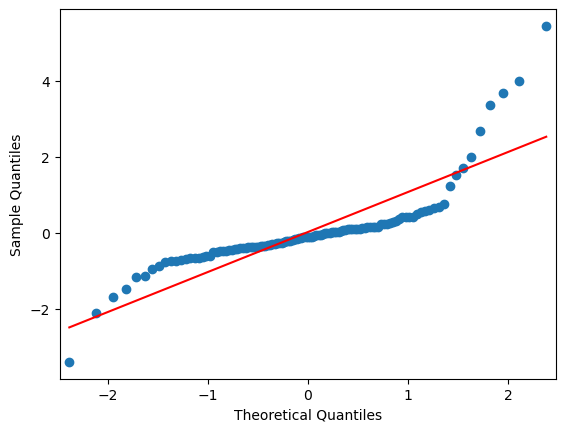

In [95]:
import numpy as np
import statsmodels.api as sm


sm.qqplot(results_garch.std_resid, line='s');

In [96]:
sm.stats.diagnostic.acorr_ljungbox(results_garch.resid, lags=[15], return_df=True)

,lb_stat,lb_pvalue
15,0.560948,1.0


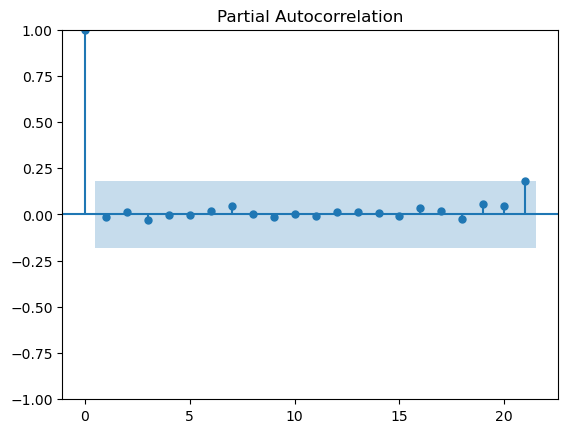

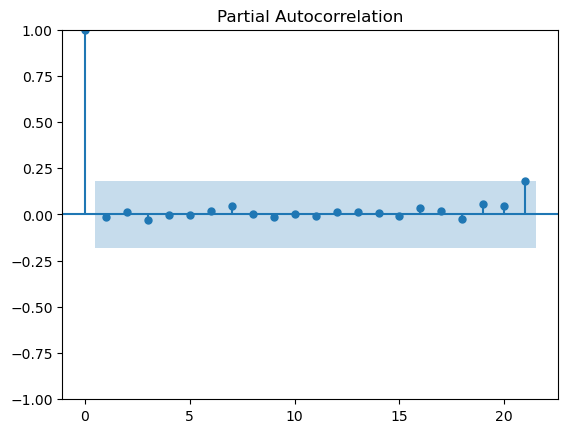

In [97]:
plot_pacf(results_garch.resid)

<Axes: xlabel='Date'>

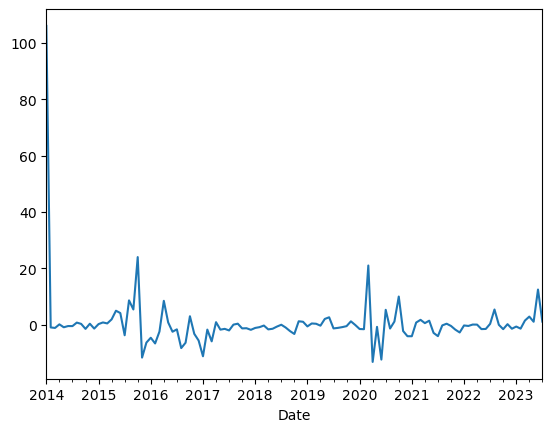

In [98]:
results_garch.resid.plot()

In [99]:
test

,Gram,Moong,Arhar,ARIMA_prediction
Date,,,,
2023-08-01,159.9,174.2,217.2,217.617381
2023-09-01,168.0,177.7,231.6,221.099888
2023-10-01,173.3,180.4,240.3,223.050525
2023-11-01,176.1,182.0,245.6,224.143124
2023-12-01,177.6,182.4,246.4,224.755116
2024-01-01,177.7,182.1,241.2,225.097907
2024-02-01,177.0,182.4,236.7,225.289913
2024-03-01,177.3,183.0,233.8,225.397460
2024-04-01,176.9,184.2,236.2,225.457700


In [100]:
prediction_gram

2023-08-01    217.617381
2023-09-01    221.099888
2023-10-01    223.050525
2023-11-01    224.143124
2023-12-01    224.755116
2024-01-01    225.097907
2024-02-01    225.289913
2024-03-01    225.397460
2024-04-01    225.457700
2024-05-01    225.491441
2024-06-01    225.510341
2024-07-01    225.520927
2024-08-01    225.526857
2024-09-01    225.530178
Freq: MS, Name: ARIMA(1,1,0)-predictions, dtype: float64

In [101]:
predicted_mu = result_gram.forecast()[0]

In [102]:
predicted_mu

217.6173808480368

In [103]:
garch_forecast = results_garch.forecast(horizon=1)

In [104]:
predicted_et = garch_forecast.mean['h.1'].iloc[-1]

In [105]:
predicted_et

0.6987214669070532

In [106]:
prediction = predicted_mu+predicted_et

In [107]:
prediction_GARCH = prediction_gram+rolling_predictions

In [108]:
prediction_GARCH

2023-08-01    221.350518
2023-09-01    224.875540
2023-10-01    233.875837
2023-11-01    227.817191
2023-12-01    228.416634
2024-01-01    229.853061
2024-02-01    232.693071
2024-03-01    229.664996
2024-04-01    229.217137
2024-05-01    230.379819
2024-06-01    231.833137
2024-07-01    231.981794
2024-08-01    229.650261
2024-09-01    230.440457
Freq: MS, dtype: float64

In [109]:
rmse(test['Arhar'],prediction_GARCH)

16.90042078032676

In [110]:
prediction_GARCH.shape

(14,)

In [111]:
test['Arhar'].shape

(14,)

In [112]:
prediction_gram.shape

(14,)

In [113]:
mse(test['Arhar'],prediction_GARCH)

285.62422255210055

In [98]:
!pip install diebold_mariano_test

In [114]:
from diebold_mariano_test import cul_d_t,MAE,MSE,cul_DM,cul_P

In [115]:
dm = cul_d_t(MAE,test['Arhar'],prediction_gram,prediction_GARCH)

In [116]:
cul_DM(dm)

5.796423700410005

In [117]:
cul_P(dm)

6.77439839935363e-09

In [119]:
MAE(3,test['Arhar'],prediction_gram)

17.249475439941307

In [120]:
dm1=cul_d_t(MAE,test['Arhar'],prediction_GARCH,prediction_gram)

In [121]:
cul_DM(dm1)

-5.796423700410005

In [122]:
test['GARCH_prediction']= prediction_GARCH

# ARIMA-LSTM

### Lag estimation

In [123]:
from statsmodels.tsa.stattools import acf
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
from pandas import DataFrame

In [124]:
acf(FinalResult_gram.resid**2,nlags=12,qstat=True)

(array([ 1.        , -0.00109767, -0.00177158, -0.00164762, -0.00210728,
        -0.00249635, -0.00227209, -0.00228027, -0.0028739 , -0.00288809,
        -0.00273348, -0.00304935, -0.00319095]),
 array([0.00015907, 0.00057669, 0.00094078, 0.00154111, 0.00239039,
        0.00309965, 0.00381989, 0.00497339, 0.00614802, 0.0072091 ,
        0.00854075, 0.01001143]),
 array([0.98993707, 0.9997117 , 0.99999233, 0.9999997 , 0.99999999,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        ]))

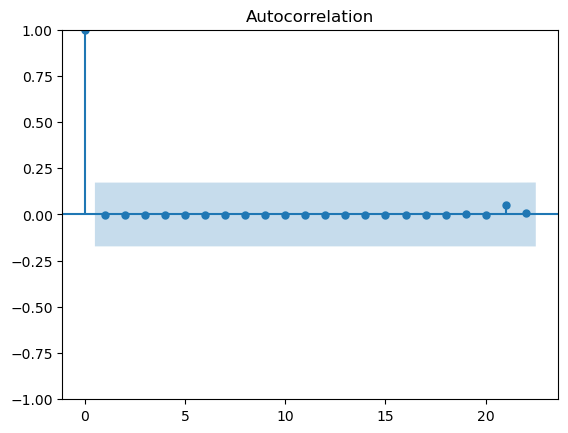

In [125]:
plot_acf(FinalResult_gram.resid**2);

In [126]:
df['resid'] = FinalResult_gram.resid**2

In [127]:
df

,Gram,Moong,Arhar,resid
Date,,,,
2014-01-01,101.8,113.6,106.7,11384.890000
2014-02-01,101.1,116.9,106.5,0.040861
2014-03-01,100.5,120.0,106.0,0.147298
2014-04-01,100.6,124.1,106.6,0.793016
2014-05-01,100.4,126.6,106.8,0.022087
...,...,...,...,...
2024-05-01,178.5,185.3,243.6,36.066390
2024-06-01,183.3,186.2,254.1,38.444762
2024-07-01,186.7,186.3,259.0,1.441936


In [128]:
mylist= ['resid']

df1 = df[mylist][1:]
df1.head()

,resid
Date,
2014-02-01,0.040861
2014-03-01,0.147298
2014-04-01,0.793016
2014-05-01,0.022087
2014-06-01,0.080539


In [129]:
dataframe = DataFrame()
for i in range(9,0,-1):
    dataframe['t-'+str(i)] = df1.shift(i).values[:,0]
dataframe['t'] = df1.values[:,0]
print(dataframe.head(10))
dataframe = dataframe[10:]

        t-9       t-8       t-7       t-6       t-5       t-4       t-3  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3       NaN       NaN       NaN       NaN       NaN       NaN  0.040861   
4       NaN       NaN       NaN       NaN       NaN  0.040861  0.147298   
5       NaN       NaN       NaN       NaN  0.040861  0.147298  0.793016   
6       NaN       NaN       NaN  0.040861  0.147298  0.793016  0.022087   
7       NaN       NaN  0.040861  0.147298  0.793016  0.022087  0.080539   
8       NaN  0.040861  0.147298  0.793016  0.022087  0.080539  0.071604   
9  0.040861  0.147298  0.793016  0.022087  0.080539  0.071604  2.278546   

        t-2       t-1         t  
0       NaN       NaN  0.040861  
1       NaN  0.040861  0.147298  
2  0.040861  0.147298  0.793016  
3  0.147298  0.793016  0.022087  
4  0

In [130]:
dataframe.to_csv('lags_12months_features.csv', index=False)

In [131]:
dataframe = pd.read_csv('lags_12months_features.csv', header=0)
array = dataframe.values

In [132]:
X = array[:,0:-1]
y = array[:,-1]

In [133]:
model = RandomForestRegressor(n_estimators=100, random_state=1)
model.fit(X, y)

RandomForestRegressor(random_state=1)

In [134]:
print(model.feature_importances_)

[0.0520427  0.048934   0.04123507 0.16285929 0.11341424 0.08187689
 0.11312321 0.17942803 0.20708658]


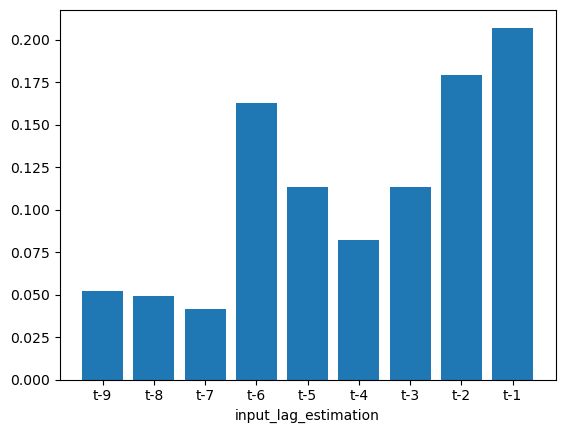

In [135]:
names = dataframe.columns.values[0:-1]
ticks = [i for i in range(len(names))]
pyplot.bar(ticks, model.feature_importances_)
pyplot.xticks(ticks, names)
pyplot.xlabel('input_lag_estimation')
pyplot.show()

In [136]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 2014-02-01 to 2024-09-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   resid   128 non-null    float64
dtypes: float64(1)
memory usage: 2.0 KB


In [137]:
train_resid = df1.iloc[:115]
test_resid = df1.iloc[115:]

In [138]:
train_resid

,resid
Date,
2014-02-01,0.040861
2014-03-01,0.147298
2014-04-01,0.793016
2014-05-01,0.022087
2014-06-01,0.080539
...,...
2023-04-01,13.234619
2023-05-01,3.279938
2023-06-01,174.960559


In [139]:
test_resid

,resid
Date,
2023-09-01,121.661578
2023-10-01,0.111009
2023-11-01,0.060048
2023-12-01,5.195914
2024-01-01,32.090224
2024-02-01,2.186401
2024-03-01,0.081435
2024-04-01,16.687099
2024-05-01,36.066390


In [140]:
from sklearn.preprocessing import MinMaxScaler

In [141]:
scaler = MinMaxScaler()
scaler.fit(train_resid)

MinMaxScaler()

In [142]:
scaled_train = scaler.transform(train_resid)
scaled_test = scaler.transform(test_resid)

In [143]:
scaled_test

array([[1.98817514e-01],
       [1.81408806e-04],
       [9.81288612e-05],
       [8.49108364e-03],
       [5.24413590e-02],
       [3.57298289e-03],
       [1.33080301e-04],
       [2.72698061e-02],
       [5.89391503e-02],
       [6.28258500e-02],
       [2.35639022e-03],
       [1.06016570e-02],
       [3.08652516e-03]])

In [261]:
pip install --upgrade keras


Note: you may need to restart the kernel to use updated packages.


In [262]:
pip install --upgrade tensorflow


Note: you may need to restart the kernel to use updated packages.


In [144]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [145]:
# Define the generator
n_input = 1 # how many data will estimate the next time stand value.
n_features = 1

train_generator = TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [146]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.utils import plot_model

In [147]:
model = Sequential()

model.add(LSTM(66, activation='relu', input_shape =(n_input,n_features)))    #relu = rectified linear unit
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [148]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 66)             │        17,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            67 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,019 (70.39 KB)

 Trainable params: 18,019 (70.39 KB)

 Non-trainable params: 0 (0.00 B)

In [149]:
plot_model(model,show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [150]:
model.fit(train_generator, epochs=25)

Epoch 1/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 825us/step - loss: 0.0221
Epoch 2/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - loss: 0.0177
Epoch 3/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - loss: 0.0319  
Epoch 4/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0066
Epoch 5/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0335 
Epoch 6/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0400
Epoch 7/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0130
Epoch 8/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - loss: 0.0187
Epoch 9/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - loss: 0.0095
Epoch 10/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - loss: 0.0135
Epoch 11/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - loss: 0.0195 
Epoch 12/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - loss: 0.0085 
Epoch 13/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - loss: 0.0316
Epoch 14/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - loss: 0.0163
Epoch 15/25
114/114 ━━━━━━━━━━━━

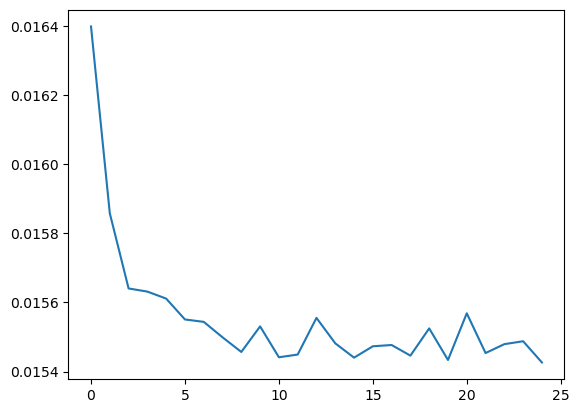

In [151]:
myloss = model.history.history['loss']

plt.plot(range(len(myloss)),myloss)

In [152]:
# Holding my prediction
test_prediction = []

# Last n_input point from the train set
first_eval_batch= scaled_train[-n_input:]

# Reshape this to the RNN format. same as TimeSeriesGenarator
current_batch = first_eval_batch.reshape((1,n_input,n_features))

# How far will we forecast?

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    
    test_prediction.append(current_pred)
    
    current_batch= np.append(current_batch[:,1:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [153]:
test_prediction

[array([0.02941273], dtype=float32),
 array([0.03406666], dtype=float32),
 array([0.03482411], dtype=float32),
 array([0.03494748], dtype=float32),
 array([0.03496758], dtype=float32),
 array([0.03497085], dtype=float32),
 array([0.03497139], dtype=float32),
 array([0.03497147], dtype=float32),
 array([0.03497148], dtype=float32),
 array([0.03497149], dtype=float32),
 array([0.03497149], dtype=float32),
 array([0.03497149], dtype=float32),
 array([0.03497149], dtype=float32),
 array([0.03497149], dtype=float32)]

In [154]:
true_prediction = scaler.inverse_transform(test_prediction)

In [155]:
true_prediction = true_prediction[:13]


In [156]:
test_resid['resid']

Date
2023-09-01    121.661578
2023-10-01      0.111009
2023-11-01      0.060048
2023-12-01      5.195914
2024-01-01     32.090224
2024-02-01      2.186401
2024-03-01      0.081435
2024-04-01     16.687099
2024-05-01     36.066390
2024-06-01     38.444762
2024-07-01      1.441936
2024-08-01      6.487428
2024-09-01      1.888725
Freq: MS, Name: resid, dtype: float64

In [157]:
test_resid['prediction Volatility ARIMA-LSTM(Random_Forest)'] = true_prediction

In [158]:
test_resid['Prediction Volatility ARIMA-GARCH']= rolling_predictions
test_resid['true Volatility']= resid_test
test_resid.to_csv('Gram volatility.csv')

In [159]:
test['ARIMA-LSTM_Pred']= test['ARIMA_prediction']+test_resid['prediction Volatility ARIMA-LSTM(Random_Forest)']

In [160]:
test

,Gram,Moong,Arhar,ARIMA_prediction,GARCH_prediction,ARIMA-LSTM_Pred
Date,,,,,,
2023-08-01,159.9,174.2,217.2,217.617381,221.350518,NaN
2023-09-01,168.0,177.7,231.6,221.099888,224.875540,239.098295
2023-10-01,173.3,180.4,240.3,223.050525,233.875837,243.896796
2023-11-01,176.1,182.0,245.6,224.143124,227.817191,245.452898
2023-12-01,177.6,182.4,246.4,224.755116,228.416634,246.140383
2024-01-01,177.7,182.1,241.2,225.097907,229.853061,246.495473
2024-02-01,177.0,182.4,236.7,225.289913,232.693071,246.689480
2024-03-01,177.3,183.0,233.8,225.397460,229.664996,246.797355
2024-04-01,176.9,184.2,236.2,225.457700,229.217137,246.857648


In [161]:
test2=test = test.dropna(subset=['ARIMA-LSTM_Pred'])

test2


,Gram,Moong,Arhar,ARIMA_prediction,GARCH_prediction,ARIMA-LSTM_Pred
Date,,,,,,
2023-09-01,168.0,177.7,231.6,221.099888,224.875540,239.098295
2023-10-01,173.3,180.4,240.3,223.050525,233.875837,243.896796
2023-11-01,176.1,182.0,245.6,224.143124,227.817191,245.452898
2023-12-01,177.6,182.4,246.4,224.755116,228.416634,246.140383
2024-01-01,177.7,182.1,241.2,225.097907,229.853061,246.495473
2024-02-01,177.0,182.4,236.7,225.289913,232.693071,246.689480
2024-03-01,177.3,183.0,233.8,225.397460,229.664996,246.797355
2024-04-01,176.9,184.2,236.2,225.457700,229.217137,246.857648
2024-05-01,178.5,185.3,243.6,225.491441,230.379819,246.891396


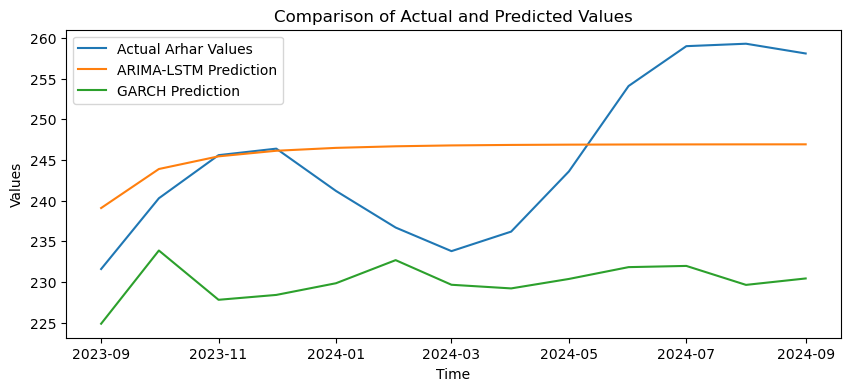

In [172]:
plt.figure(figsize=(10, 4))
plt.plot(test['Arhar'], label='Actual Arhar Values')
plt.plot(test['ARIMA-LSTM_Pred'], label='ARIMA-LSTM Prediction')
plt.plot(test['GARCH_prediction'], label='GARCH Prediction')

# Adding labels, title, and legend
plt.xlabel("Time")
plt.ylabel("Values")
plt.title("Comparison of Actual and Predicted Values")
plt.legend()
plt.show()

In [173]:
rmse(test['Arhar'],test['ARIMA-LSTM_Pred'])

8.619702023874524

In [174]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [175]:
mean_absolute_percentage_error(test['Arhar'],test['ARIMA-LSTM_Pred'])

3.0254316948044346

In [176]:
test.to_csv('Gram_result with ARIMA-LSTM Random forecst.csv')